# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

Equipo 8
1. Jose Fabricio Barahona Amaya
2. Kevin Brandon Cruz Mejía
3. Abraham Esses Cohen
4. Luis Miguel González Gutiérrez
5. Oscar Javier Medellín Robledo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np
import os
import cv2

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

<ipython-input-4-ce81723eaa7b>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


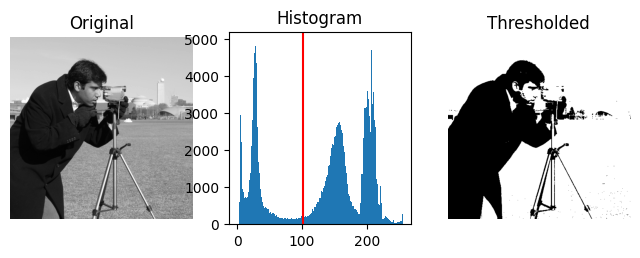

In [ ]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




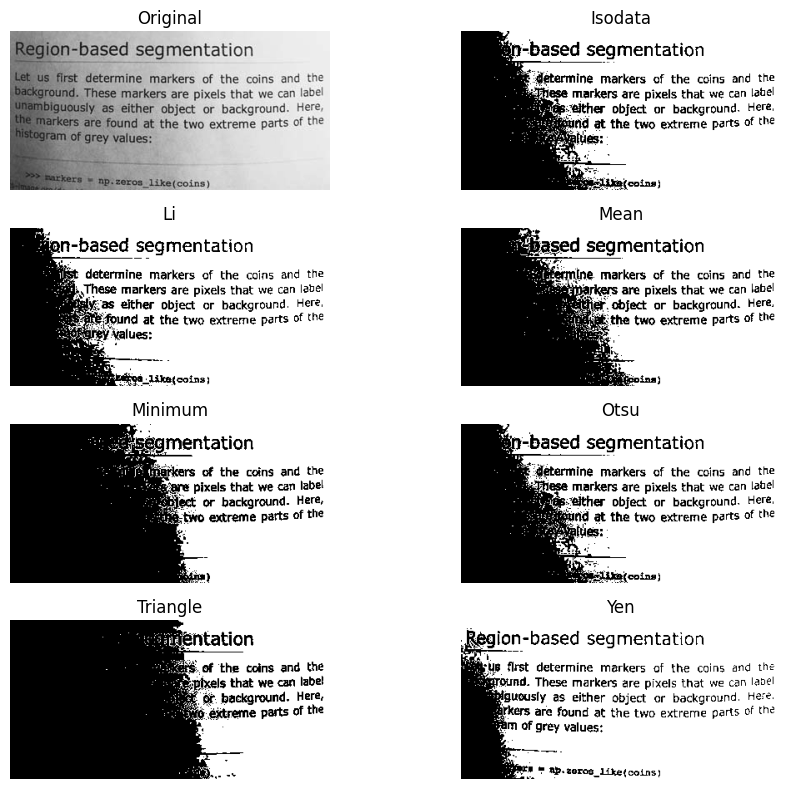

In [ ]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
# TODO: Slide image for segmentation, alpha blerding

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

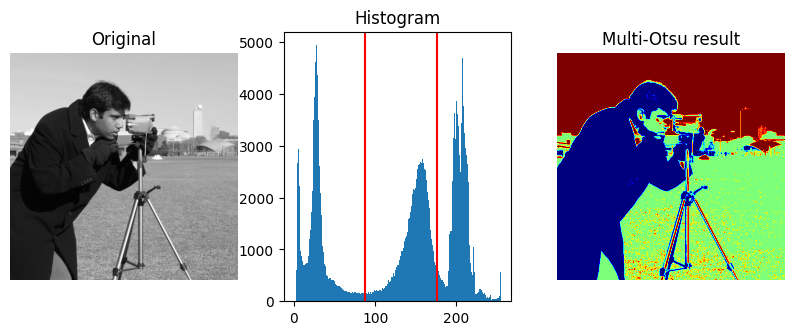

In [ ]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# TAREA 9.2

El método de Otsu o algoritmo de Otsu, es una técnica popular en el procesamiento de imágenes, fue desarrollado por Nobuyuki Otsu en 1979 y es ampliamente utilizado para la segmentación de imágenes.

El objetivo del thresholding es separar los píxeles en dos clases: primer plano y fondo asi con el método de Otsu se determina automáticamente el valor  del thresholding óptimo que minimiza la varianza intra-clase (varianza dentro de cada clase) y maximiza la varianza entre clases (varianza entre clases).

### Ejercicio a)

Experimenta con diferentes imagenes ademas de las provistas en en Colab, identifca imagenes con diferentes backgrounds y estilos, cuales son las limitaciones de single thresholding contra el algoritmo de Otsu.

In [ ]:
import skimage as ski

### Single Threshold

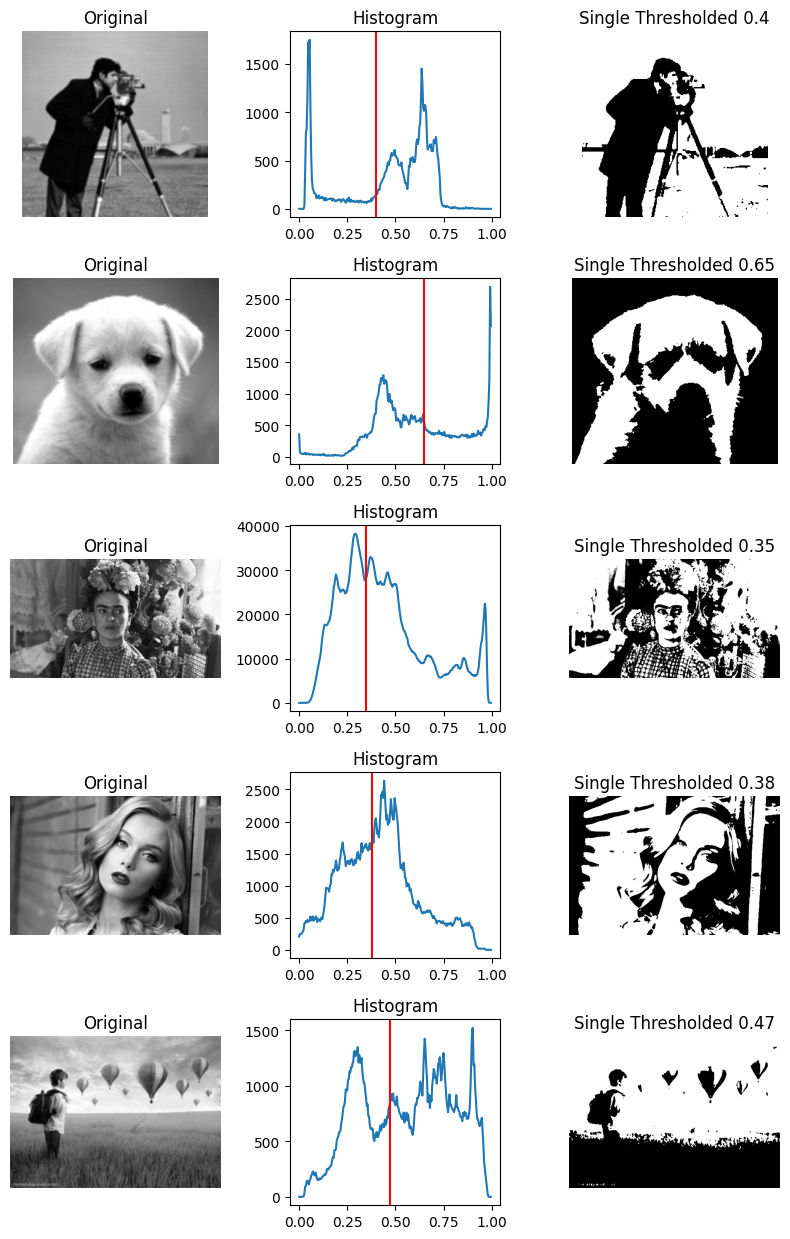

In [ ]:
# Define the path to the folder containing images
folder_path = '/content/drive/MyDrive/Colab Notebooks/TC4033.10_VisionComputacional/Tarea_9.2/imagenes/'

# Get the list of files in the folder
files = os.listdir(folder_path)

# Count the number of files
num_files = len(files)

grid_len = 3

# Parameters
single_thresh = [0.4, 0.65, 0.35, 0.38, 0.47]

# Create a figure and subplots
fig, axs = plt.subplots(num_files, grid_len, figsize=(8, 2.5 * num_files))
#ax = axes.ravel()

for i, image_file in enumerate(files):

  # Construct the full path to the image file
  image_path = os.path.join(folder_path, image_file)
  # Open the image file using PIL (Python Imaging Library)
  #image = Image.open(image_pat
  img = cv2.imread(image_path)
  #img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # blur the image to denoise
  blurred_img = ski.filters.gaussian(img_gray, sigma=1.0)
  # create a histogram of the blurred grayscale image
  histogram, bin_edges = np.histogram(blurred_img, bins=256, range=(0.0, 1.0))
  # create a mask based on the threshold
  t = single_thresh[i]

  ret,binary_mask = cv2.threshold(blurred_img, t, 255, cv2.THRESH_BINARY)

  # Plot the color image
  axs[i, 0].imshow(blurred_img, cmap="gray")
  axs[i, 0].axis('off')
  axs[i, 0].set_title('Original')
  # Plot Histogram
  axs[i, 1].plot(bin_edges[0:-1], histogram)
  axs[i, 1].axvline(t, color='r')
  axs[i, 1].set_title('Histogram')
  # Plot the grayscale image
  axs[i, 2].imshow(binary_mask, cmap="gray")
  axs[i, 2].axis('off')
  axs[i, 2].set_title('Single Thresholded '+str(t))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Otsu Threshold

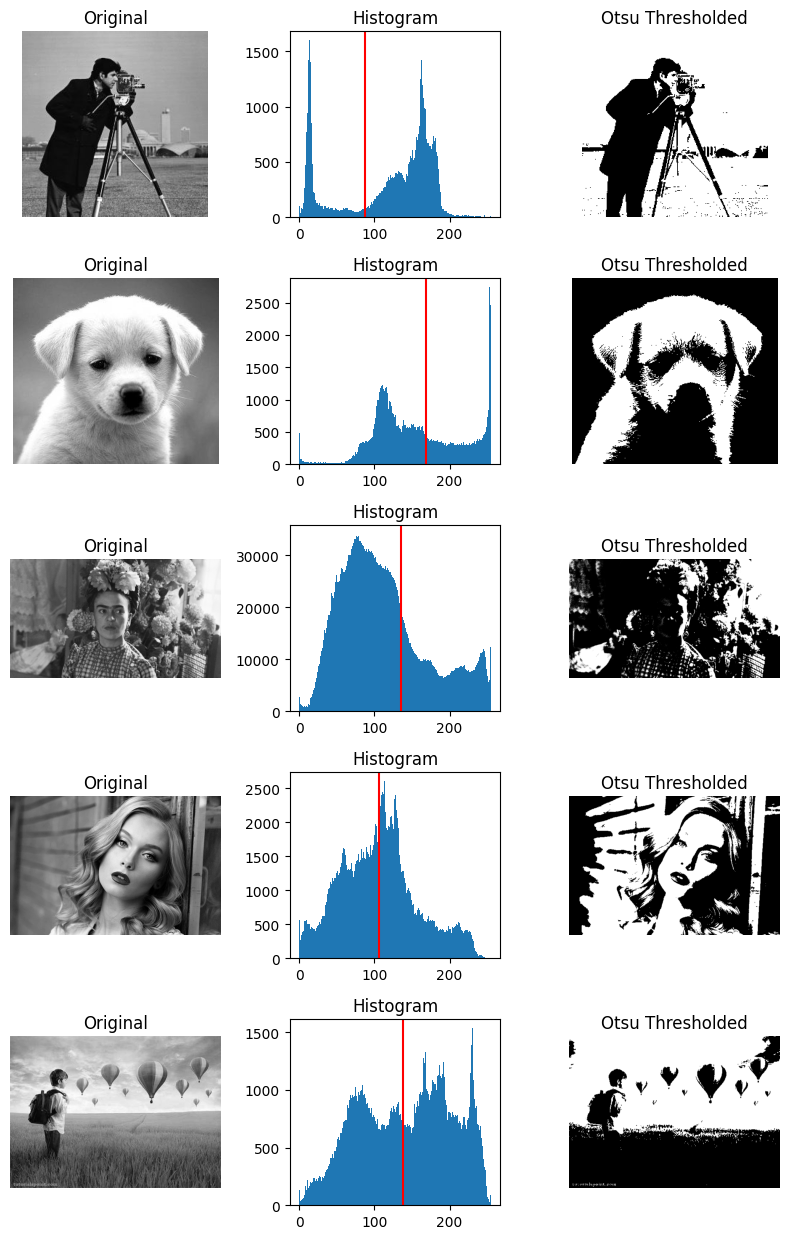

In [ ]:
# Define the path to the folder containing images
folder_path = '/content/drive/MyDrive/Colab Notebooks/TC4033.10_VisionComputacional/Tarea_9.2/imagenes/'

# Get the list of files in the folder
files = os.listdir(folder_path)

# Count the number of files
num_files = len(files)

grid_len = 3

# Parameters
##

# Create a figure and subplots
fig, axs = plt.subplots(num_files, grid_len, figsize=(8, 2.5 * num_files))
ax = axes.ravel()

for i, image_file in enumerate(files):
  # Construct the full path to the image file
  image_path = os.path.join(folder_path, image_file)

  # Open the image file using PIL (Python Imaging Library)
  #image = Image.open(image_pat
  img = cv2.imread(image_path)
  #img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  thresh = threshold_otsu(img_gray)
  binary = img_gray > thresh


  # Plot the color image
  axs[i, 0].imshow(img_gray, cmap="gray")
  axs[i, 0].axis('off')
  axs[i, 0].set_title('Original')

  # Plot Histogram
  axs[i, 1].hist(img_gray.ravel(), bins=256)
  axs[i, 1].axvline(thresh, color='r')
  axs[i, 1].set_title('Histogram')

  # Plot the grayscale image
  axs[i, 2].imshow(binary, cmap="gray")
  axs[i, 2].axis('off')
  axs[i, 2].set_title('Otsu Thresholded')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Conclusiones a)

Las desventajas de la tecnica the "simple thresholding" es que se debe de hacer una conjetura sobre el umblal (threshold) inspeccionando el histograma de la imagen.

En este ejercicio podemos ver que una limitacion es que puede no funcionar de manera optima cuando el histograma  no muestra dos picos distintos en la distribucion de intensidades de pixeles.

Tambien podemos ver que si hay cambios en las distribuciones de intensidades de los pixeles afectan en el rendimiento del algoritmo.

Encontrar un valor adecuado requiere de cierto conocimiento de la técnica para interpretar de forma correcta el histograma y experienica o práctica. Es un proceso de prueba y error. En nuestro caso ocupamos 10 iteraciones para tratar de acercarnos a lo entregado por el modelo de Otsu.


### Ejercicio b) (Opcional)

Como en un proyecto previo, es posible aplicar Otsu para ventanas de diferentes tamaños, obteniendo mejores resultados. Realiza esta implementacion y ve como mejoran los resultados con el ejemplo de la hoja de papel.

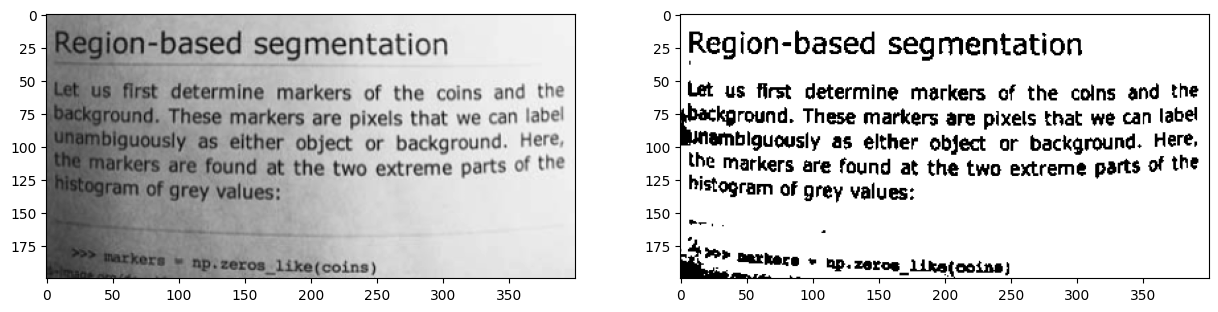

In [ ]:
# Obtener la imagen
gray_image = data.page()

# Resize the image to 384x192
image = cv2.resize(image, (400, 200))

# Obtener dimensiones de la imagen
height, width = image.shape[:2]

# Dividir la imagen en dos áreas
area1 = image[:, :width // 2]  # Área izquierda
area2 = image[:, width // 2:]   # Área derecha

# Definir el número de regiones para cada área
rows_area1, cols_area1 = 2, 25
rows_area2, cols_area2 = 2, 2

# Calcular el tamaño de las regiones para cada área
region_height_area1 = height // rows_area1
region_width_area1 = (width // 2) // cols_area1

region_height_area2 = height // rows_area2
region_width_area2 = (width // 2) // cols_area2

# Inicializar listas para almacenar las regiones segmentadas
segmented_regions_area1 = []
segmented_regions_area2 = []

# Segmentar el área 1 en regiones y aplicar Otsu a cada región
for y in range(rows_area1):
    for x in range(cols_area1):
        # Definir las coordenadas de la región en el área 1
        y_start = y * region_height_area1
        y_end = (y + 1) * region_height_area1
        x_start = x * region_width_area1
        x_end = (x + 1) * region_width_area1

        # Obtener la región del área 1
        region = area1[y_start:y_end, x_start:x_end]

        # Aplicar Otsu a la región del área 1
        _, thresholded_region = cv2.threshold(region, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Agregar la región segmentada del área 1 a la lista
        segmented_regions_area1.append(thresholded_region)

# Segmentar el área 2 en regiones y aplicar Otsu a cada región
for y in range(rows_area2):
    for x in range(cols_area2):
        # Definir las coordenadas de la región en el área 2
        y_start = y * region_height_area2
        y_end = (y + 1) * region_height_area2
        x_start = x * region_width_area2
        x_end = (x + 1) * region_width_area2

        # Obtener la región del área 2
        region = area2[y_start:y_end, x_start:x_end]

        # Aplicar Otsu a la región del área 2
        _, thresholded_region = cv2.threshold(region, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Agregar la región segmentada del área 2 a la lista
        segmented_regions_area2.append(thresholded_region)

# Concatenar las regiones del área 1 verticalmente en filas de 4
result_area1 = np.vstack([np.hstack(segmented_regions_area1[i:i+cols_area1]) for i in range(0, len(segmented_regions_area1), cols_area1)])

# Concatenar las regiones del área 2 verticalmente en filas de 2
result_area2 = np.vstack([np.hstack(segmented_regions_area2[i:i+cols_area2]) for i in range(0, len(segmented_regions_area2), cols_area2)])

# Apilar ambas áreas horizontalmente
result = np.hstack((result_area1, result_area2))

# Mostrar la imagen original y la imagen binaria resultante
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result, cmap="gray")

### Conclusiones b)

Debido a que exite un mayor sombreado de un lado de la oja de papel que del otro, decidimos dividir la imagen
en dos áreas y en cada área crear un diferente número de regiones. Se tuvieron que tener varias consideraciones:
1. Al dividir la imagen en dos áreas, al momento de hacer un hstack, el número de matrices o filas deben de coincidir.
2. El área de la derecha tiene un espacio en blanco bastante amplio, no se puede usar un número de regiones muy alta ya que el cálculo del umbral de Otsu tomaría cualquier ruido para el cálculo, generando secciones negras.
3. Para obtener la mejor calidad de imagen de lado sombreado, se recomienda usar la mayor cantidad de regiones posibles.
4. Podemos observar que determina el umbral óptimo al maximizar la varianza entre clases de las intensidades de píxeles, lo que resulta en una segmentación precisa y eficiente de la imagen, entonces tambien es robusto ante variaciones en la iluminación y el contraste de la imagen.

Al final encontramos una combinación de filas y columnas (regiones) que nos dio un resultado bastante aceptable, haciendo el texto claro y eliminadno casi toda la zona sombreada.

# Bibliografía

Image Processing with Python: Thresholding. (2024, February 2). https://datacarpentry.org/image-processing/07-thresholding.html#:~:text=Thresholding%20produces%20a%20binary%20image,only%20one%20colour%20value%20channel.

GfG. (2021, July 29). Mahotas   Otsu s method. GeeksforGeeks. https://www.geeksforgeeks.org/mahotas-otsus-method/